<div style ="text-align: center; background-color: #0099ff; font-family: verdana; color: white; font-size: 45px; font-weight: bold; padding: 15px">
Đồ án quan hoá dữ liệu
</div>

Import package

In [81]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

<div style ="text-align: center; background-color: #66c2ff; font-family: verdana; color: white; font-size: 30px; font-weight: bold; padding: 15px">
I. Data understanding
</div>

In [82]:
ls data/

hotel_bookings.csv


In [83]:
pdf = pd.read_csv("data/hotel_bookings.csv")

### 1. Đếm số dòng và số cột.

In [84]:
print("So dong cua Dataset: ", pdf.shape[0])
print("So cot cua Dataset: ", pdf.shape[1])

So dong cua Dataset:  119390
So cot cua Dataset:  32


### 2. Viết bảng mô tả về các cột.

Bang mo ta ve cac cot
* hotel: tên khách sạn, gồm 2 loại (resort hotel và city hotel)
* is_canceled: có hủy hay không (1 là có huỷ và 0 là ngược lại)
* lead_time: thời gian chờ từ lúc đặt lịch trên hệ thống cho tới lúc nhận phòng
* arrival_date_year: năm nhận phòng
* arrival_date_month: tháng nhận phòng
* arrival_date_week_number: tuần trong năm nhận phòng
* arrival_date_day_of_month: ngày nhận phòng trong tháng
* stays_in_weekend_nights: số buổi tối cuối tuần (thứ bảy và chủ nhật) mà khách đã đặt
* stays_in_week_nights: số buổi tối trong tuần mà khách đã đặt
* adults: số người lớn
* children: số trẻ nhỏ
* babies: số em bé
* meal: loại bữa ăn mà khách hàng đặt
* country: 
...

* reservation_status: trạng thái đặt chỗ
* reservation_status_date: ngày trạng thái đặt chỗ

### 3. Lấy 5 điểm dữ liệu ra làm mẫu.

In [85]:
pdf.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.000000,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.000000,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.000000,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,NaN,0,Transient,75.000000,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,NaN,0,Transient,98.000000,0,1,Check-Out,7/3/2015


### 4. Phân tích tỷ lệ missing rate.

In [86]:
pdf.isnull().sum()/len(pdf)

hotel                            0.000000
is_canceled                      0.000000
lead_time                        0.000000
arrival_date_year                0.000000
arrival_date_month               0.000000
arrival_date_week_number         0.000000
arrival_date_day_of_month        0.000000
stays_in_weekend_nights          0.000000
stays_in_week_nights             0.000000
adults                           0.000000
children                         0.000034
babies                           0.000000
meal                             0.000000
country                          0.004087
market_segment                   0.000000
distribution_channel             0.000000
is_repeated_guest                0.000000
previous_cancellations           0.000000
previous_bookings_not_canceled   0.000000
reserved_room_type               0.000000
assigned_room_type               0.000000
booking_changes                  0.000000
deposit_type                     0.000000
agent                            0

### 5. Phân tích tỷ lệ duplicate.

In [87]:
len(pdf.drop_duplicates())/len(pdf)

0.7320211072954184

Drop những dòng dữ liệu bị duplicate

In [88]:
pdf = pdf.drop_duplicates()

### 6. Fill missing rate.

In [89]:
pdf = pdf.fillna(-1)

In [90]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

<div style ="text-align: center; background-color: #66c2ff; font-family: verdana; color: white; font-size: 30px; font-weight: bold; padding: 15px">
II. EDA 1D
</div>

### 1. Chia loại dữ liệu num hoặc cate.

In [91]:
cate_list = list(pdf.dtypes[pdf.dtypes == 'object'].index)
print("There is", len(cate_list), "cate column")

There is 12 cate column


In [92]:
num_list = list(pdf.dtypes[pdf.dtypes != 'object'].index)
print("There is", len(num_list), "num column")

There is 20 num column


#### num 

In [93]:
#Proportion of each column
for i in range(len(num_list)):
    print(pdf[num_list[i]].value_counts(normalize=True))
    print("\n")

is_canceled
0   0.725102
1   0.274898
Name: proportion, dtype: float64


lead_time
0     0.068401
1     0.036798
2     0.022049
3     0.019497
4     0.017964
        ...   
410   0.000011
411   0.000011
371   0.000011
532   0.000011
463   0.000011
Name: proportion, Length: 479, dtype: float64


arrival_date_year
2016   0.485045
2017   0.362625
2015   0.152330
Name: proportion, dtype: float64


arrival_date_week_number
33   0.031958
34   0.028502
32   0.028022
28   0.026820
30   0.026717
31   0.026168
29   0.025138
27   0.024784
35   0.024086
18   0.023903
21   0.023388
15   0.022758
17   0.021488
23   0.021420
20   0.021088
13   0.020802
19   0.020745
25   0.020436
22   0.020058
24   0.019978
26   0.019898
16   0.019875
14   0.019372
41   0.019028
11   0.018971
38   0.018708
7    0.018651
10   0.018651
36   0.018605
43   0.018365
39   0.018193
9    0.018067
12   0.017999
44   0.017735
8    0.017449
37   0.016866
42   0.016534
40   0.016328
53   0.016282
45   0.015046
6    0.014863
47  

In [94]:
pd.options.display.float_format = '{:,.6f}'.format
percentiles = [0.01] + [0.05*x for x in range(1, 20)] + [0.99]

In [95]:
for i in range(len(num_list)):  
    print(pdf[num_list[i]].describe(percentiles=percentiles))

count   87,396.000000
mean         0.274898
std          0.446466
min          0.000000
1%           0.000000
5%           0.000000
10%          0.000000
15%          0.000000
20%          0.000000
25%          0.000000
30%          0.000000
35%          0.000000
40%          0.000000
45%          0.000000
50%          0.000000
55%          0.000000
60%          0.000000
65%          0.000000
70%          0.000000
75%          1.000000
80%          1.000000
85%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: is_canceled, dtype: float64
count   87,396.000000
mean        79.891368
std         86.052325
min          0.000000
1%           0.000000
5%           0.000000
10%          1.000000
15%          4.000000
20%          7.000000
25%         11.000000
30%         17.000000
35%         23.000000
40%         31.000000
45%         39.000000
50%         49.000000
55%         61.000000
60%         73.000000
65%         88.00000

### 3. Phân tích phân phối đối biến num

Cột num đầu tiên và cũng là cột num mang ý nghĩa quyết định của tập dữ liệu

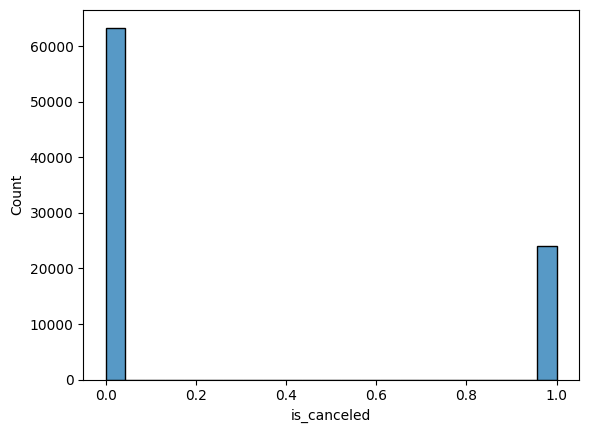

In [96]:
ax = sns.histplot(pdf[num_list[0]])

6 cột num tiếp theo và cũng là 6 cột num có độ đa dạng dữ liệu cao.

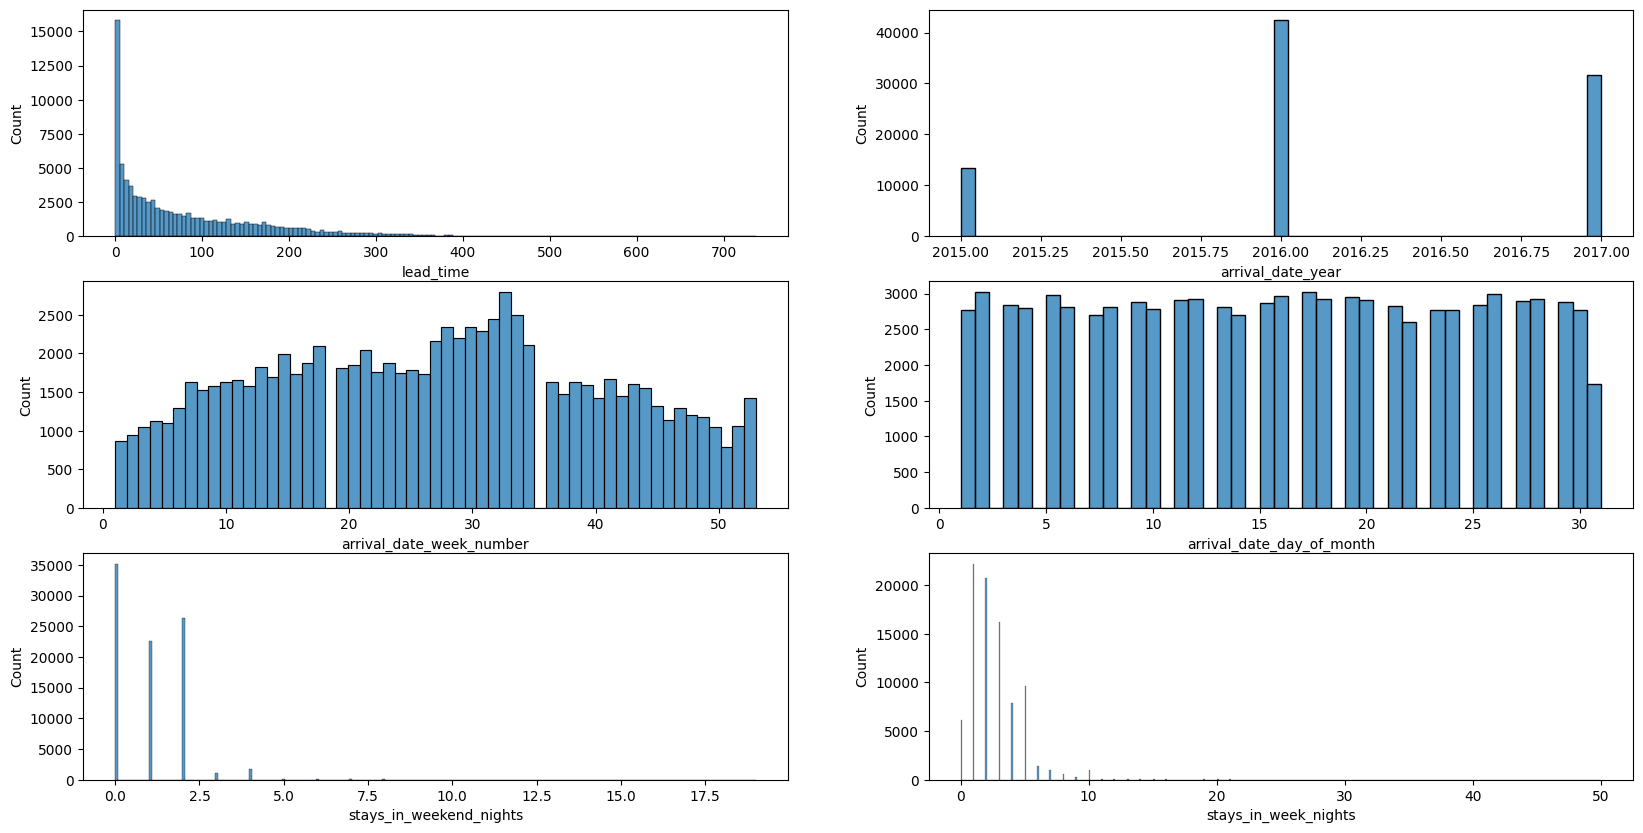

In [97]:
fig = plt.subplots(nrows=3,ncols=2,figsize=(20,10))
for i in range(1,7):
    plt.subplot(3,2,i)
    ax = sns.histplot(pdf[num_list[i]])

5 cột num còn lại có dữ liệu được nằm gọn ở một số giá trị nhất định

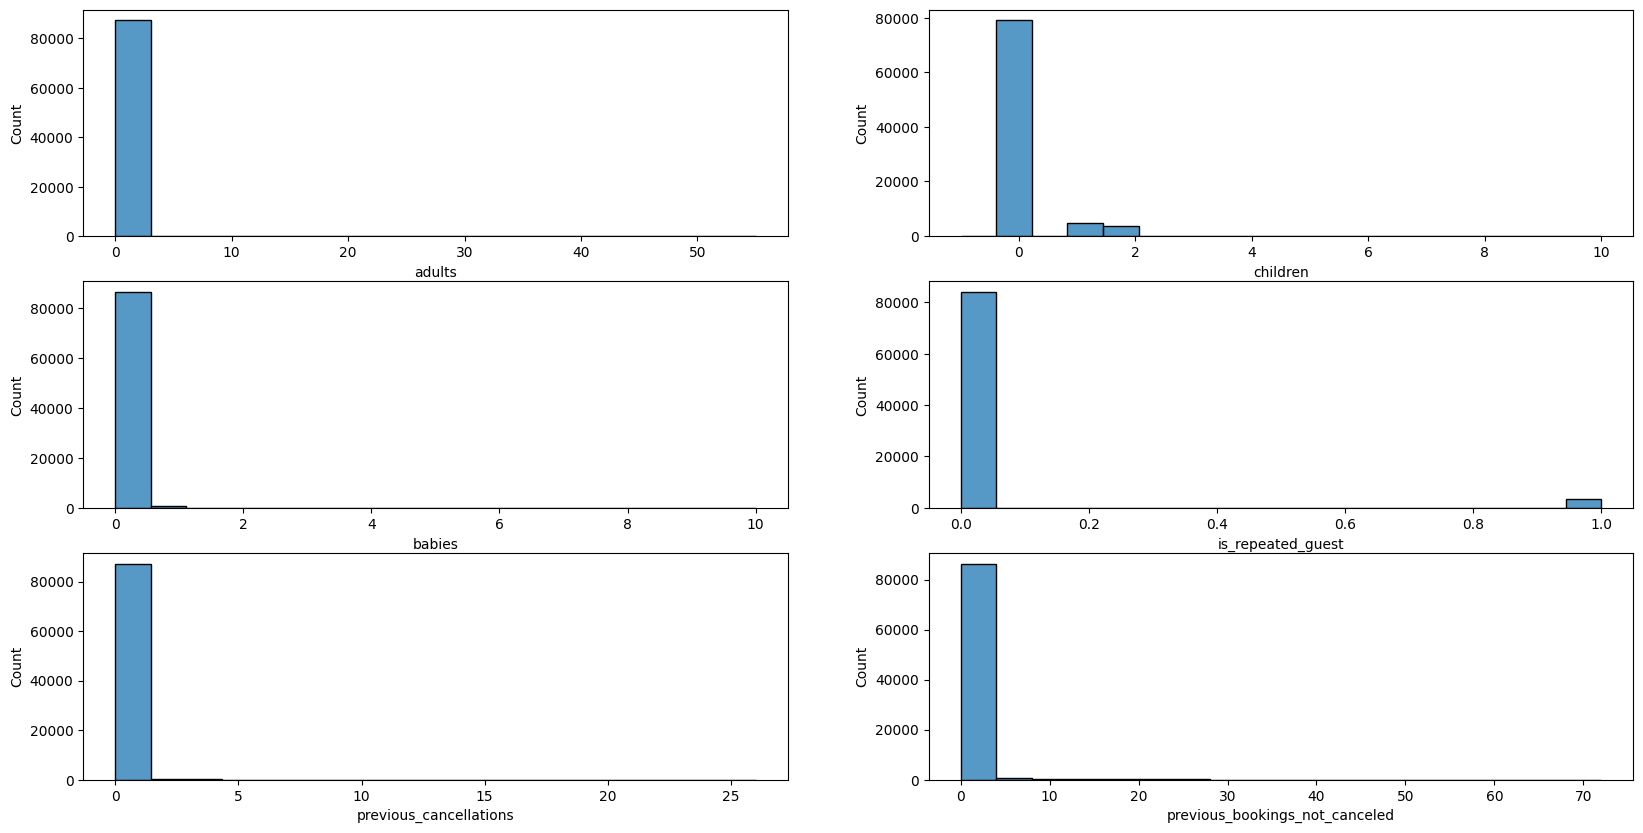

In [98]:
fig = plt.subplots(nrows=3,ncols=2,figsize=(20,10))
for i in range(7, 13):
    plt.subplot(3,2,i-6)
    ax = sns.histplot(pdf[num_list[i]])


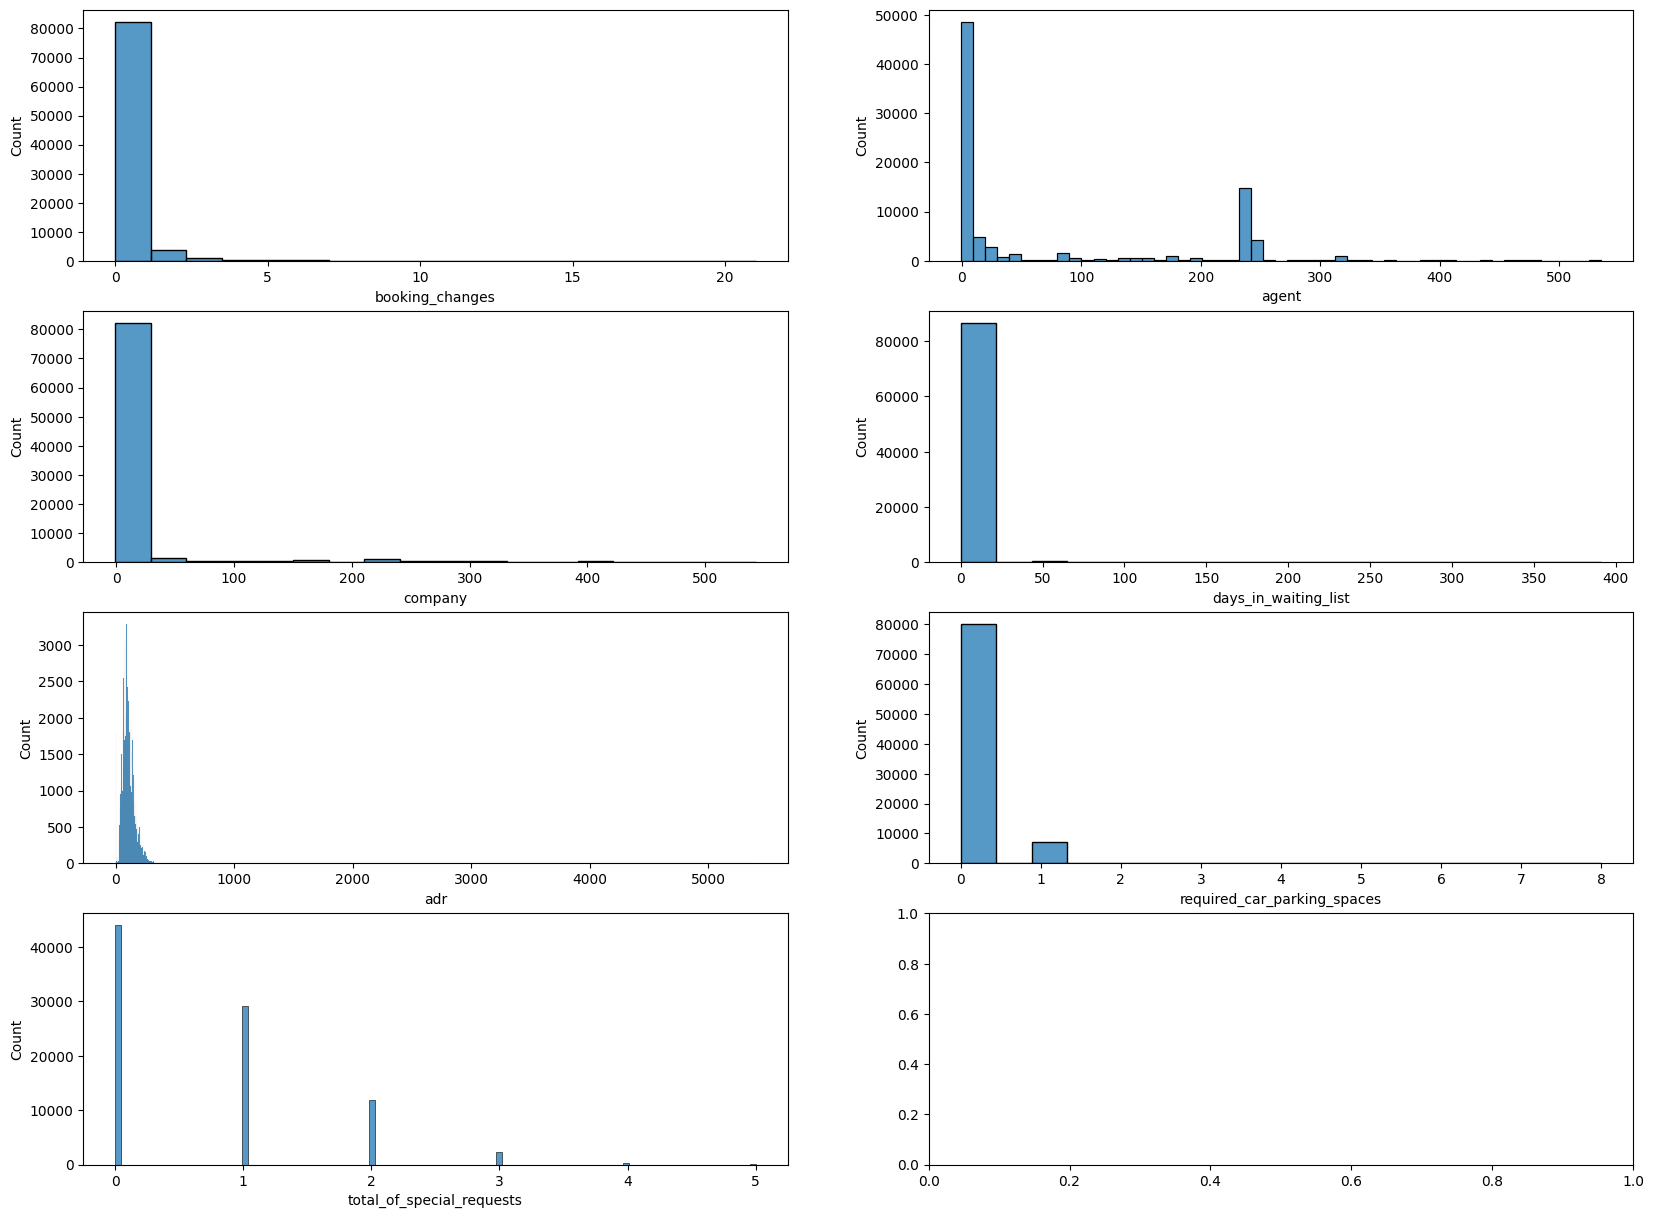

In [99]:
fig = plt.subplots(nrows=4,ncols=2,figsize=(20,15))
for i in range(13, 20):
    plt.subplot(4,2,i-12)
    ax = sns.histplot(pdf[num_list[i]])


### cate 

In [100]:
for i in range(len(cate_list)):
    print(pdf[cate_list[i]].value_counts(normalize=True))
    print("\n")

hotel
City Hotel     0.611332
Resort Hotel   0.388668
Name: proportion, dtype: float64


arrival_date_month
August      0.128805
July        0.115074
May         0.095599
April       0.090485
June        0.088848
March       0.085965
October     0.079340
September   0.076548
February    0.069774
December    0.058710
November    0.057154
January     0.053698
Name: proportion, dtype: float64


meal
BB          0.777816
SC          0.108483
HB          0.103952
Undefined   0.005630
FB          0.004119
Name: proportion, dtype: float64


country
PRT   0.314122
GBR   0.119376
FRA   0.101114
ESP   0.082979
DEU   0.061639
        ...   
MMR   0.000011
BFA   0.000011
CYM   0.000011
MLI   0.000011
KHM   0.000011
Name: proportion, Length: 178, dtype: float64


market_segment
Online TA       0.590622
Offline TA/TO   0.158920
Direct          0.135063
Groups          0.056547
Corporate       0.048194
Complementary   0.008032
Aviation        0.002597
Undefined       0.000023
Name: proportion, dtype:

<div style ="text-align: center; background-color: #66c2ff; font-family: verdana; color: white; font-size: 30px; font-weight: bold; padding: 15px">
III. EDA 2D
</div>

### 1. Phân tích hệ số tương quan giữa các biến num

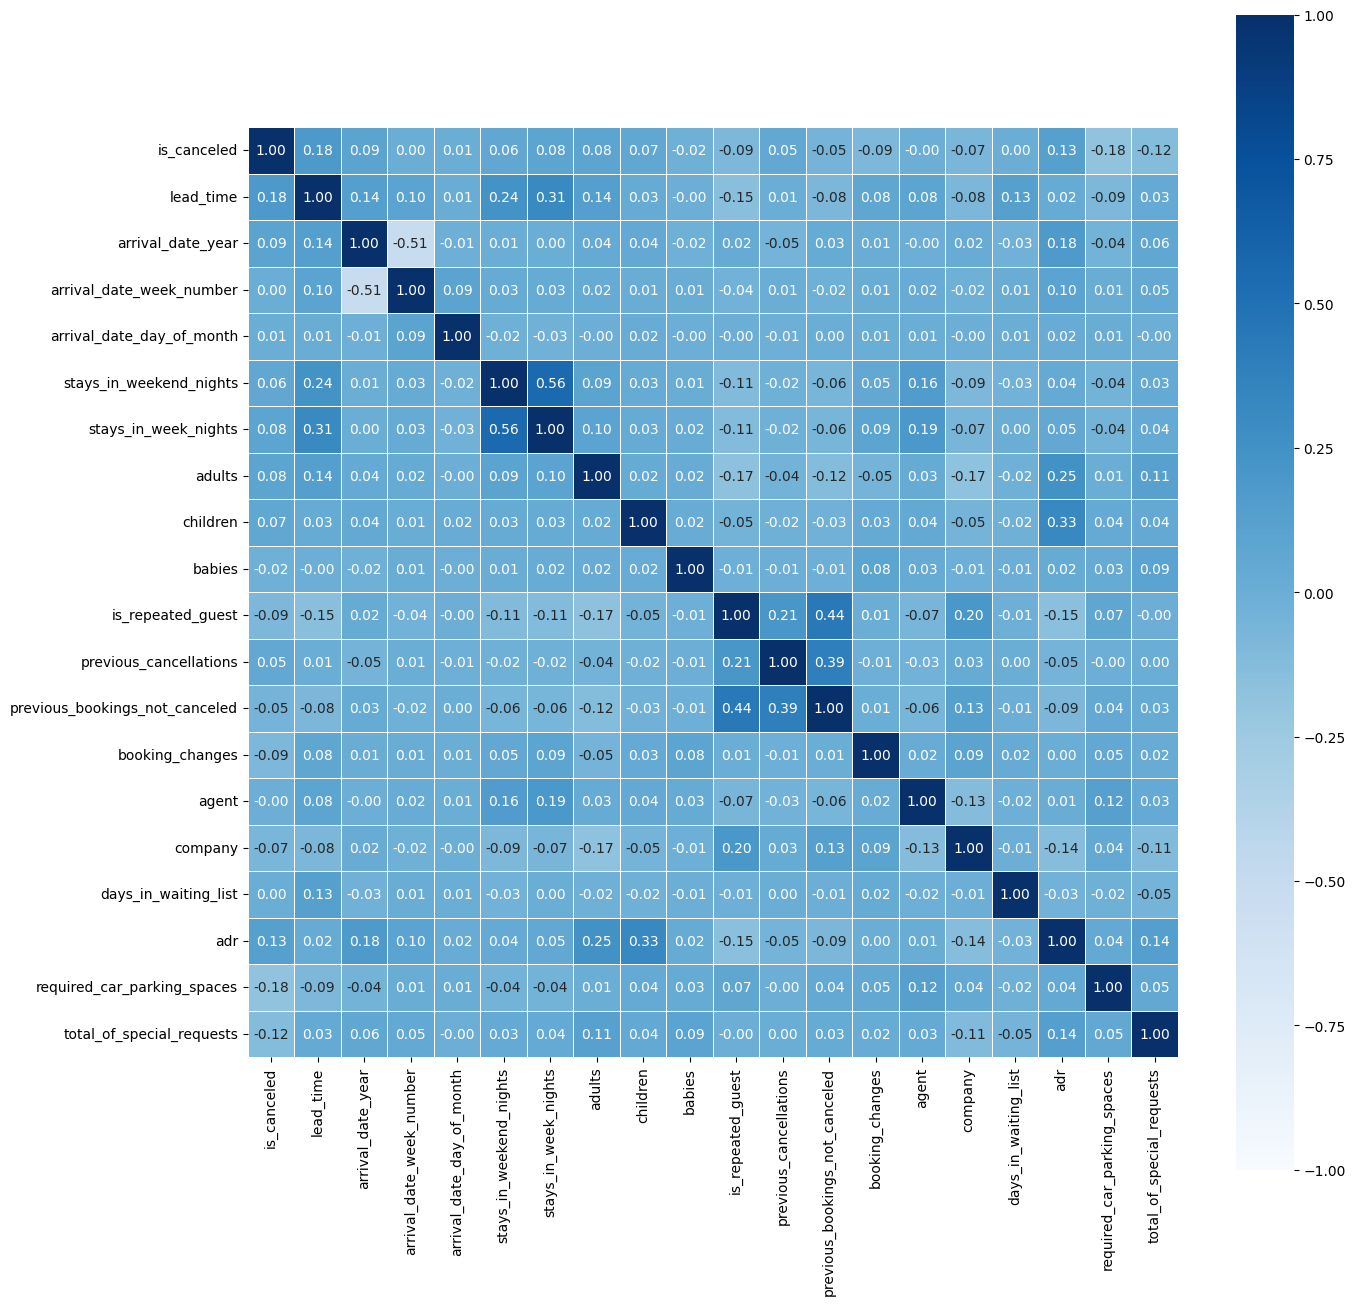

In [101]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(pdf[num_list].corr(), annot=True, fmt=".2f", linewidths=.5, square = True, cmap="Blues", vmin=-1, vmax=1)

In [102]:
num_list[12]

'previous_bookings_not_canceled'

### 2. Sử dụng Scatter plot để phân tích dữ liệu 2D.

#### Tương quan của previous_cancelation và previous_booking_not_canceled

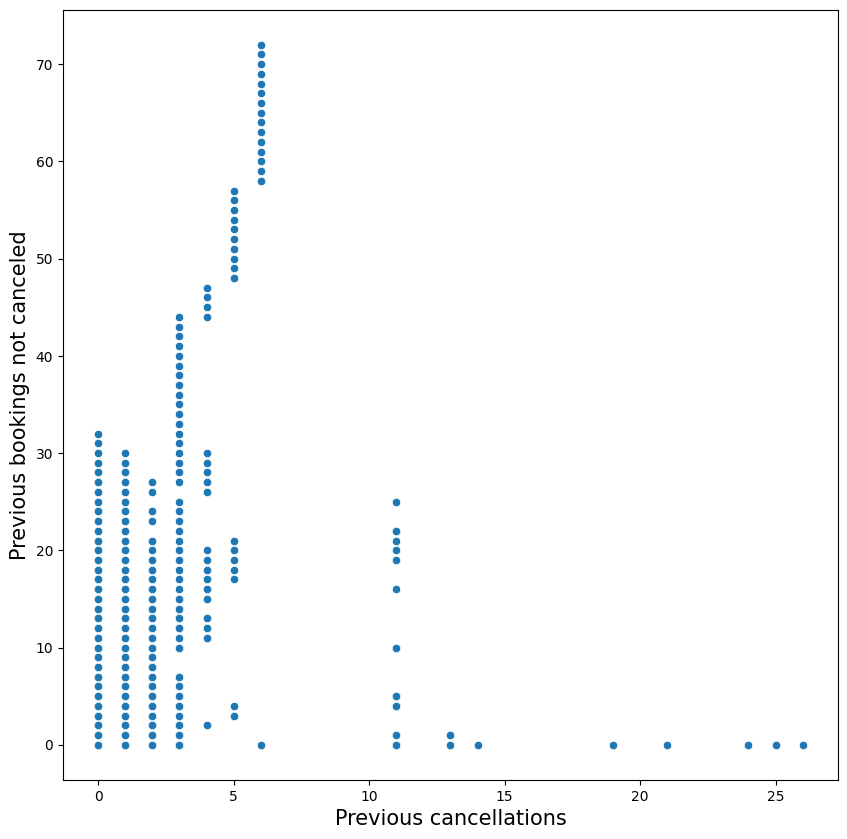

In [103]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=pdf, x="previous_cancellations", y="previous_bookings_not_canceled")
plt.xlabel('Previous cancellations', size = 15)
plt.ylabel('Previous bookings not canceled', size = 15)
plt.show()

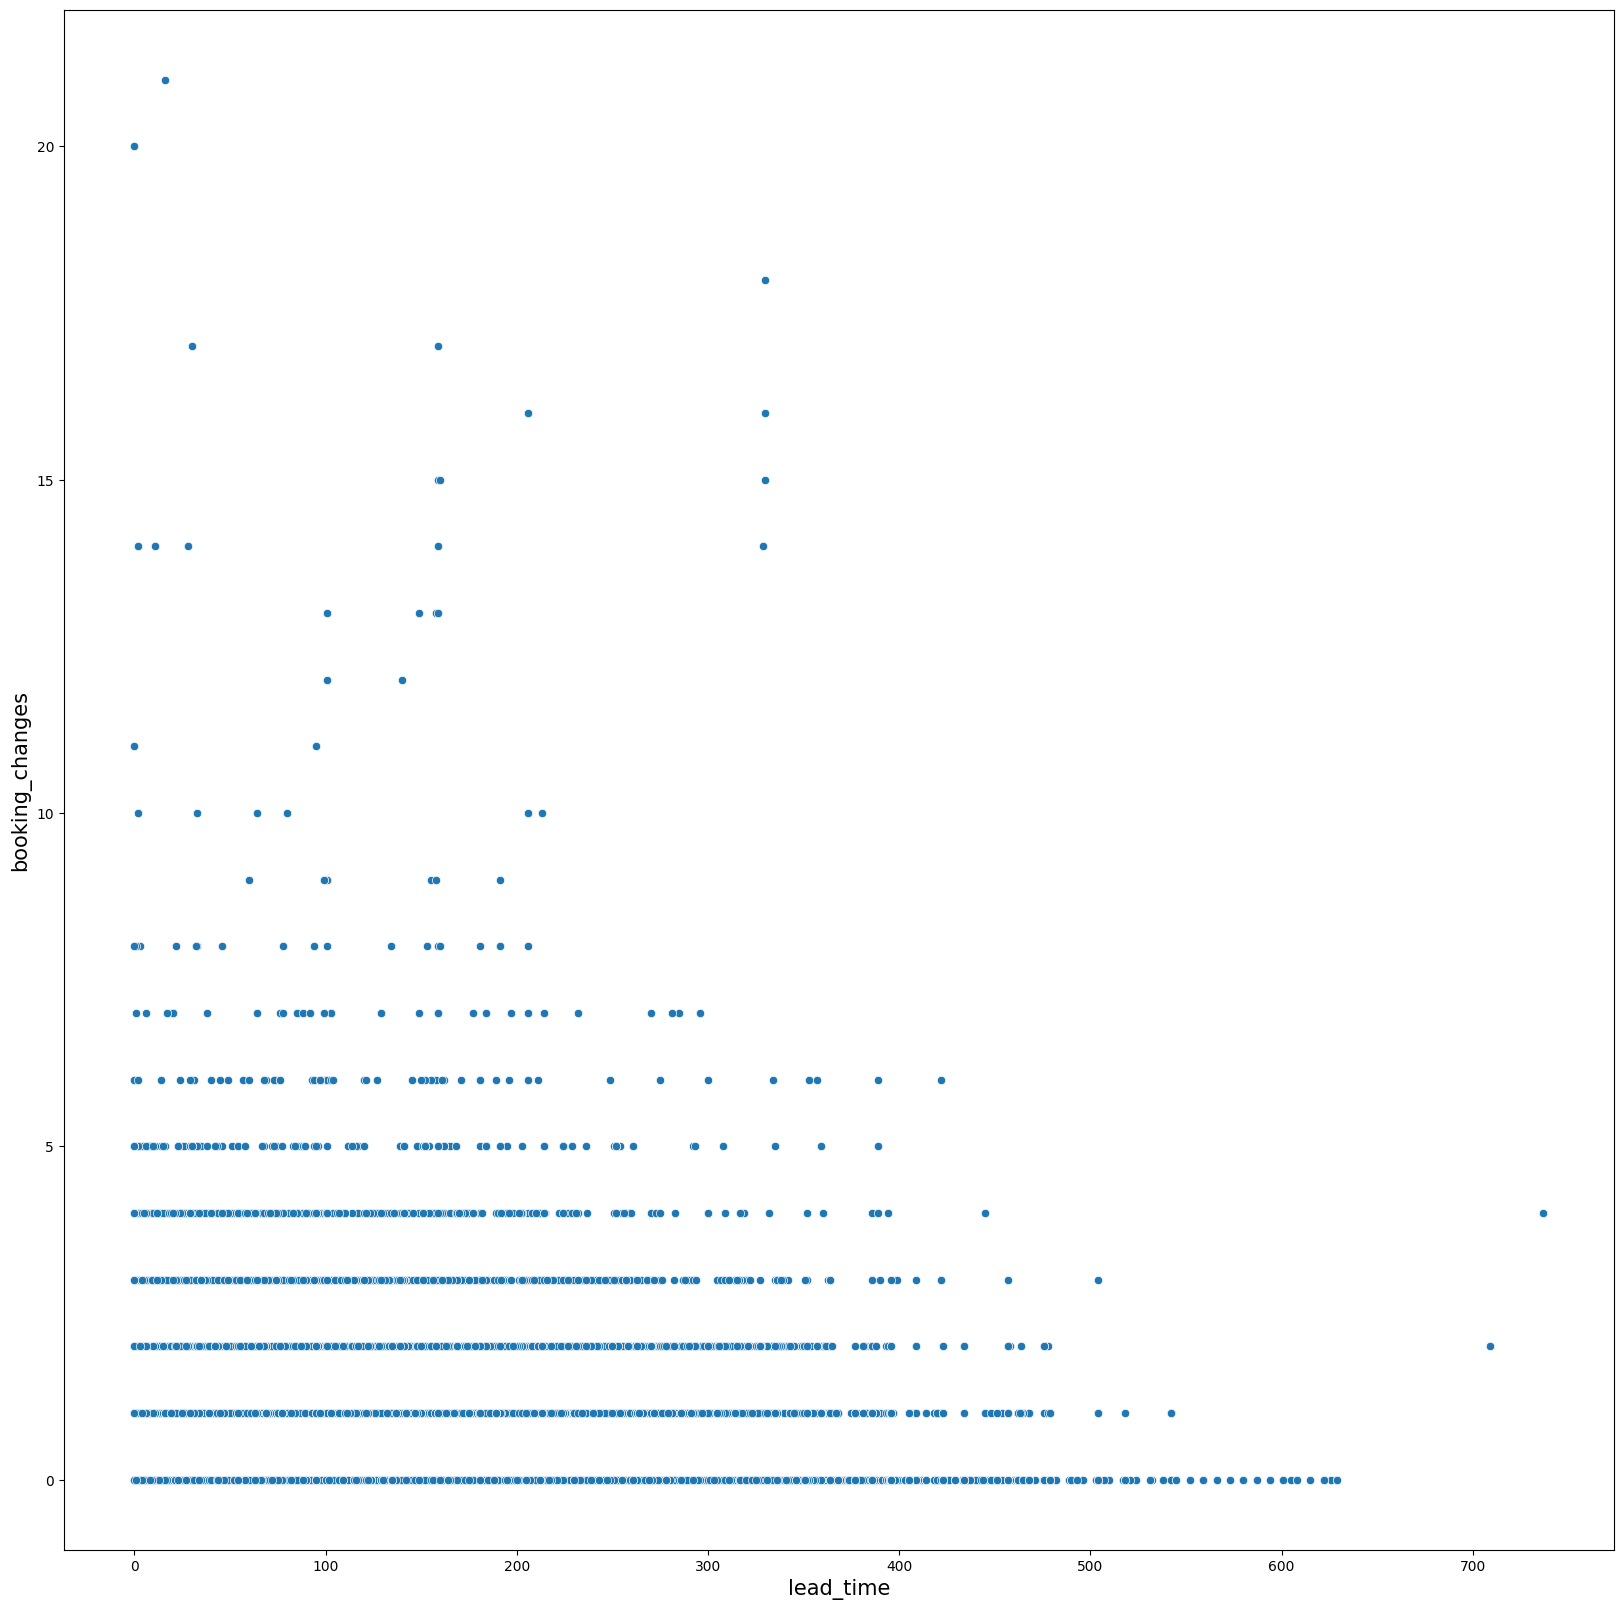

In [104]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.scatterplot(data=pdf, x="lead_time", y="booking_changes")
plt.xlabel('lead_time', size = 15)
plt.ylabel('booking_changes', size = 15)
plt.show()

Lead time có xu hướng tỉ lệ nghịch với booking_changes

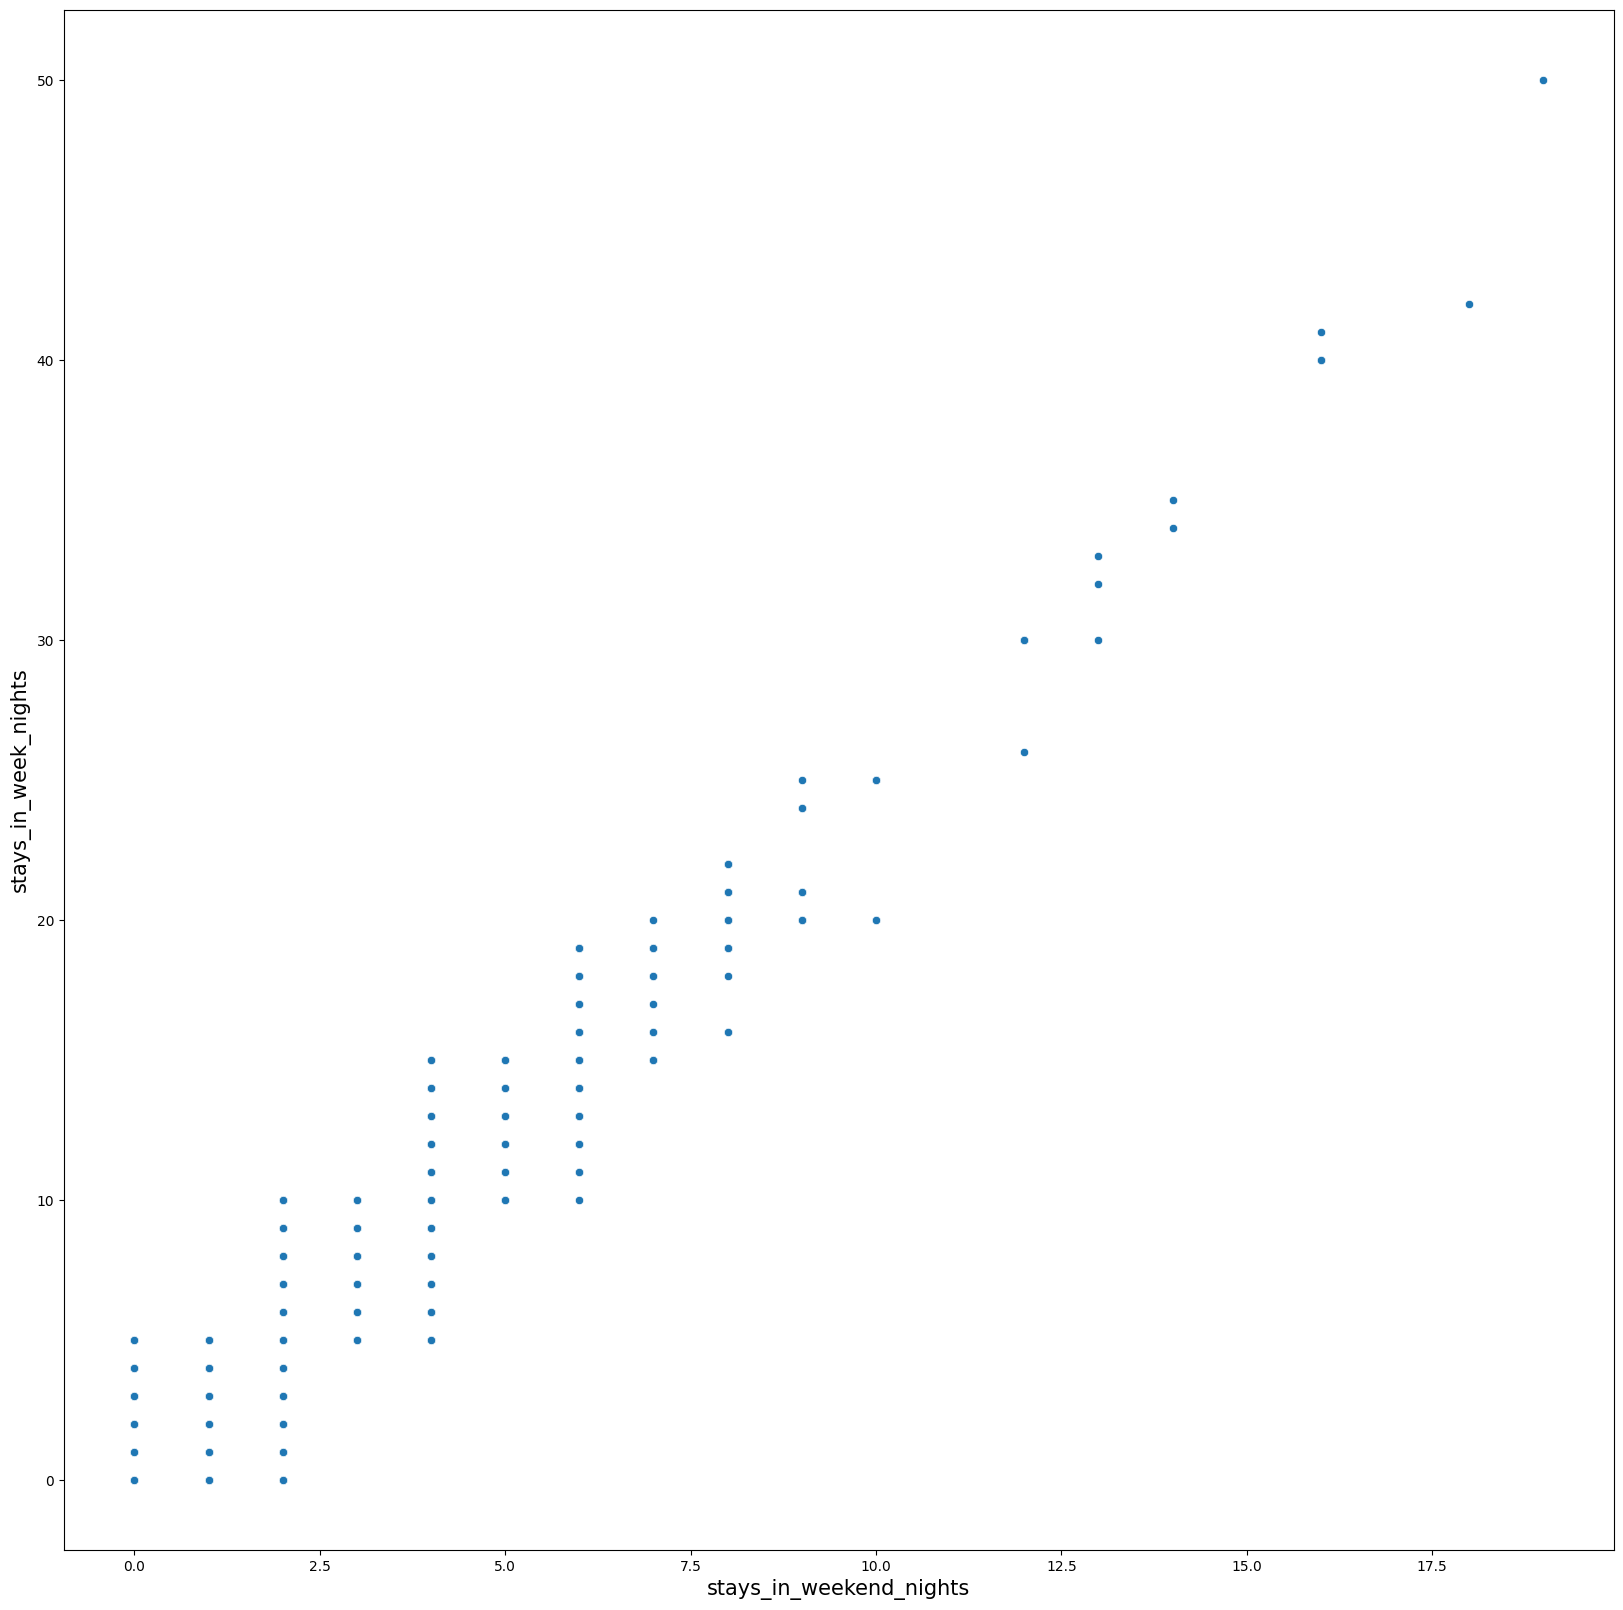

In [105]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.scatterplot(data=pdf, x="stays_in_weekend_nights", y="stays_in_week_nights")
plt.xlabel('stays_in_weekend_nights', size = 15)
plt.ylabel('stays_in_week_nights', size = 15)
plt.show()

stay_in_weekend_nights tương quan thuận với stay_in_week_day

### 3. Sử dụng bar chart để phân tích dữ liệu num và cate

#### Đa phần các khách đặt chỗ đến từ nước nào?

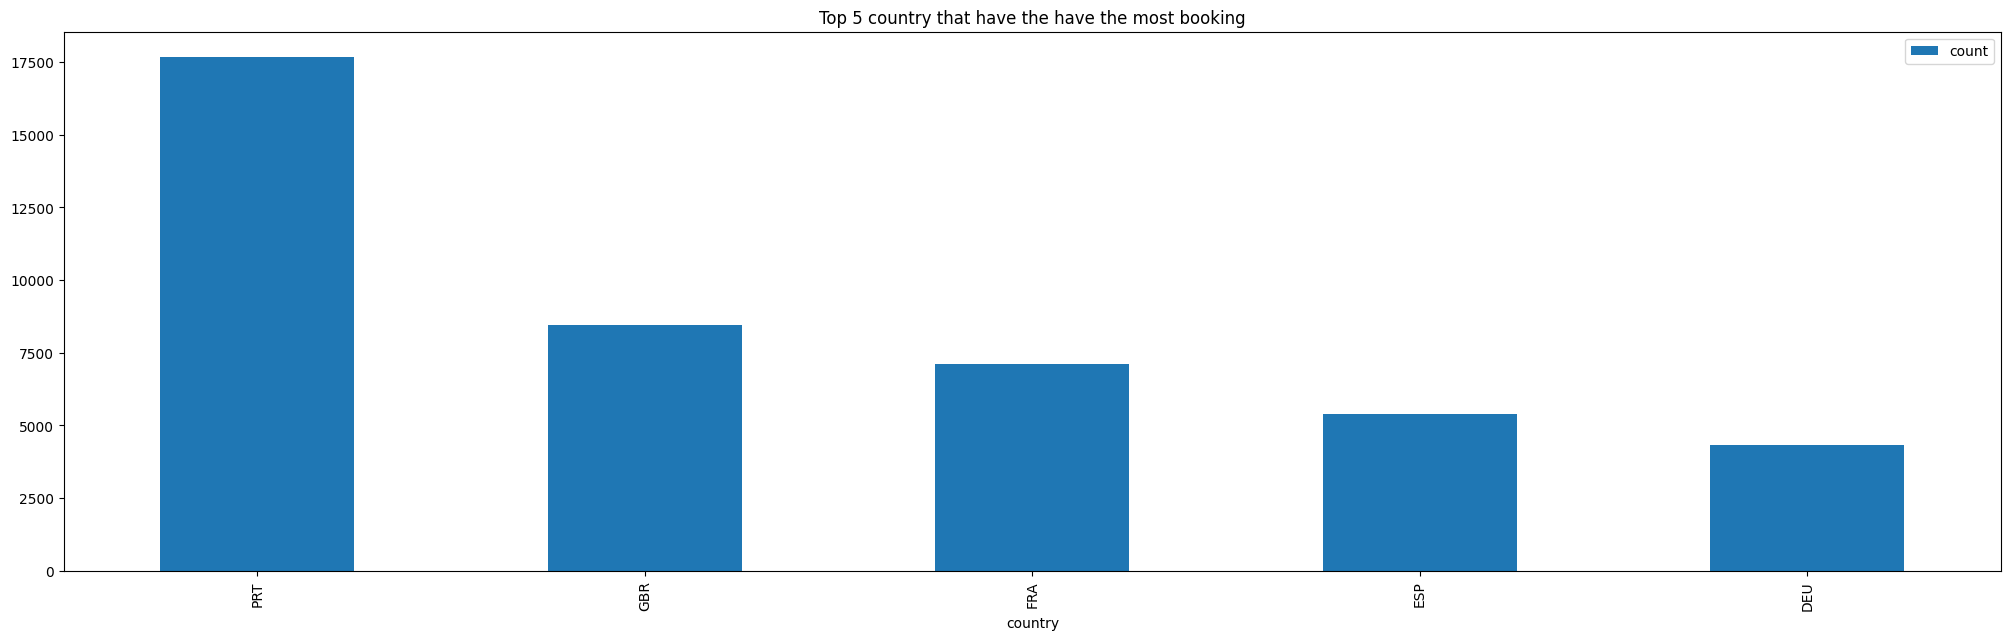

In [106]:
data_country = pd.DataFrame(pdf.loc[pdf['is_canceled'] != 1]['country'].value_counts())
data_country.head(5).plot(kind='bar', figsize=(25, 7), stacked=True, title="Top 5 country that have the have the most booking");

Có thể thấy một phần rất lớn du khách đến từ PRT (Bồ Đào Nha), có thể hotel và resort đang được ghi nhận nằm ở Bồ Đào Nha.

#### Xu hướng huỷ lịch đặt của khách lần đầu với khách quen (đã sử dụng dịch vụ của khách sạn từ một lần trở lên) có khác nhau không?

<Axes: title={'center': 'Number of canceled made by guest type'}, xlabel='is_repeated_guest'>

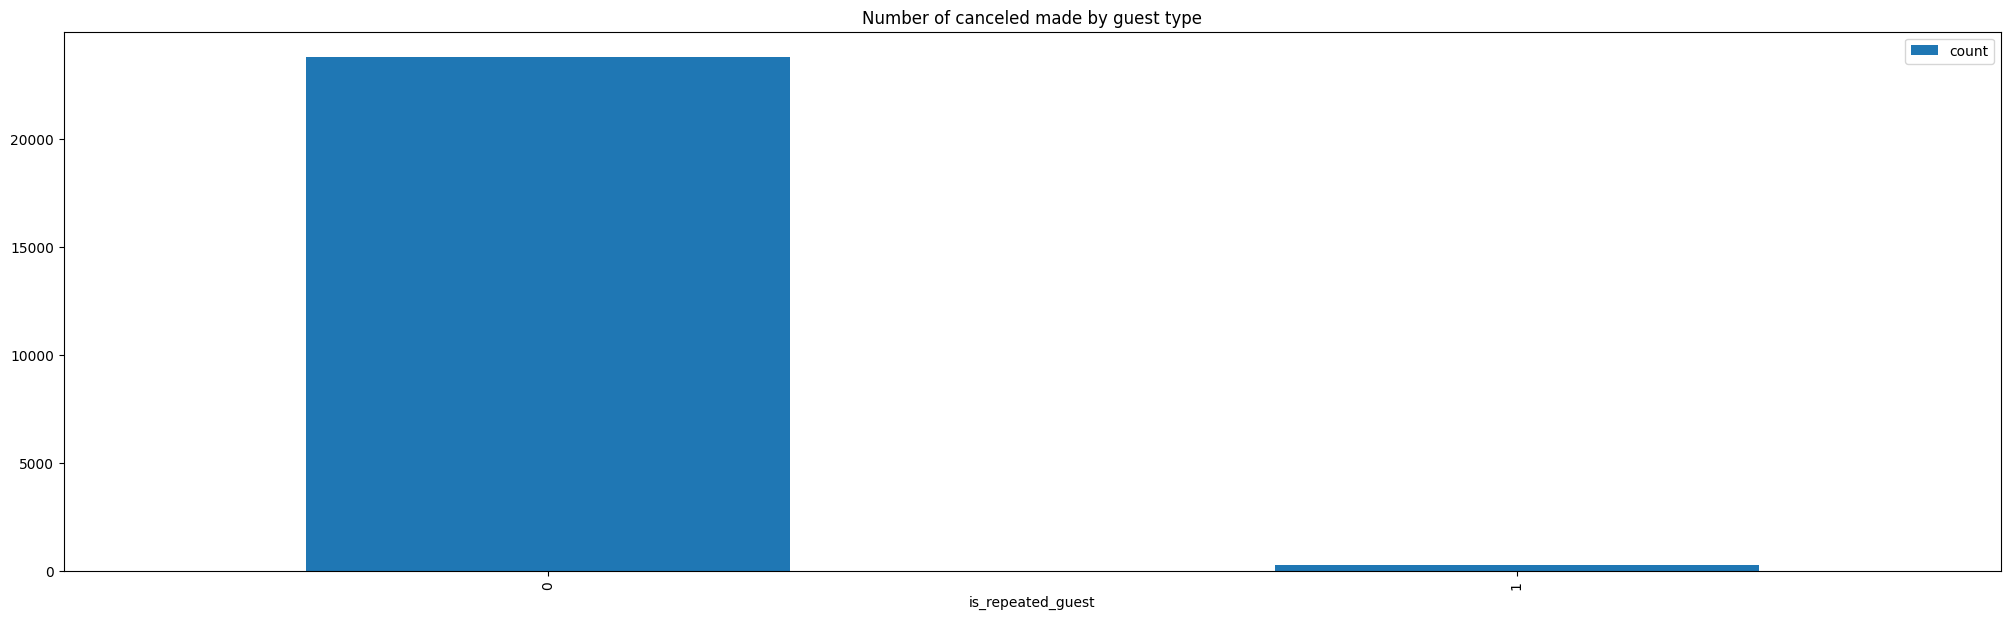

In [107]:
data_canceled = pd.DataFrame(pdf.loc[pdf['is_canceled'] == 1]['is_repeated_guest'].value_counts())
data_canceled.plot(kind='bar', figsize=(25, 7), stacked=True, title="Number of canceled made by guest type")

Phần lớn các trường hợp huỷ hẹn được thực hiện bởi khách đặt lần đầu.

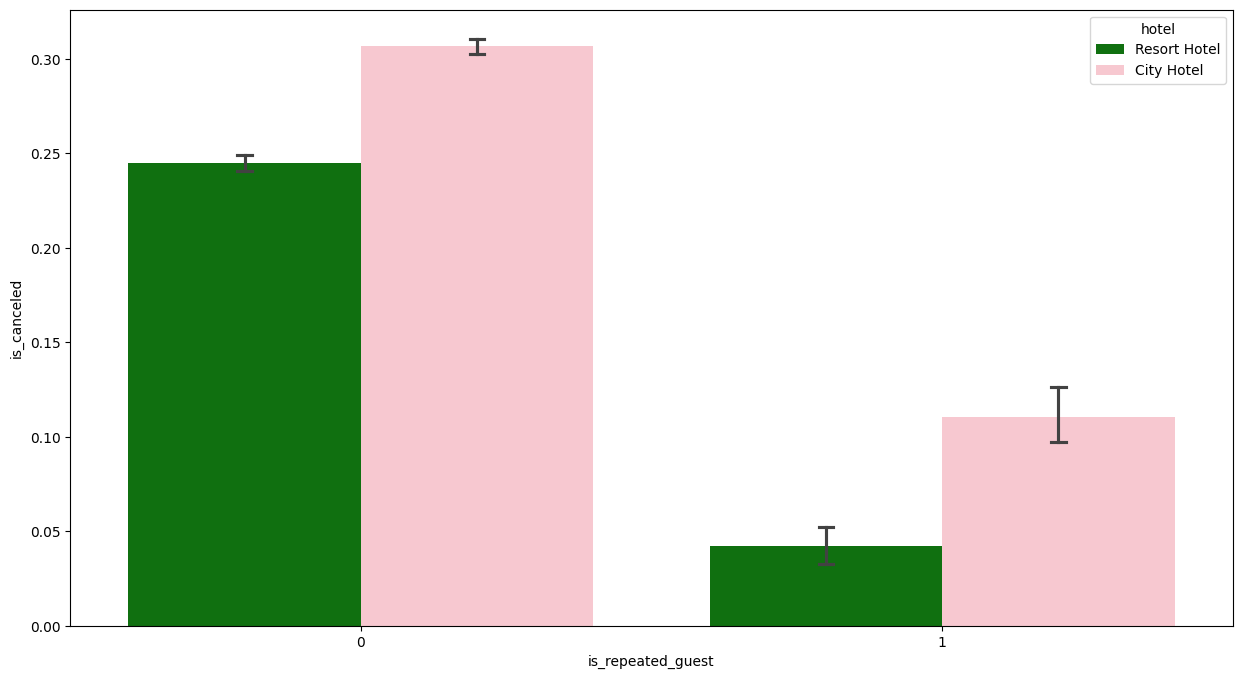

In [108]:
pal = {'Resort Hotel': "green", 'City Hotel': "pink"}
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "is_repeated_guest", 
                 y = "is_canceled", 
                 hue = 'hotel',
                 data=pdf, 
                 palette = pal,
                 linewidth=5,
                 order = ['0','1'],
                 capsize = .05,

                )

Tỉ lệ huỷ lịch của khách đặt lần đầu cao hơn nhiều lần so với tỉ lệ huỷ lịch của khách quen.

#### Khách sạn được đặt qua kênh là nhiều nhất?

<Axes: xlabel='distribution_channel', ylabel='count'>

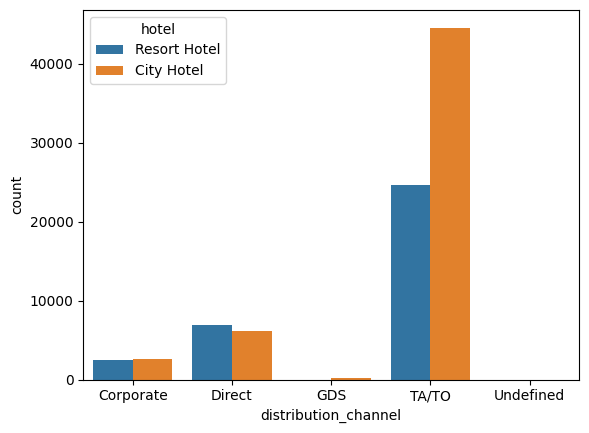

In [109]:
sns.countplot(x = 'distribution_channel', data = pdf.sort_values('distribution_channel'), hue='hotel') 

Đa phòng các phòng được đặt thông qua kênh TA/TO nghĩa là các thông qua các kênh dịch vụ du lịch. Đứng ở vị trí thứ hai lần lượt là do khách hàng tự đặt và do công ty đặt cho.

### 4. Tính tỷ trọng đối với hai biến cate.

In [110]:
pdf.groupby([cate_list[0]]).agg({num_list[2]: ['min', 'mean', 'std', 'max']})

arrival_date_year                            
                           min         mean      std   max
hotel                                                     
City Hotel                2015 2,016.253968 0.659292  2017
Resort Hotel              2015 2,016.141604 0.720948  2017

In [111]:
pdf.groupby([cate_list[0], cate_list[1]]).agg({cate_list[2]: 'count'})/len(pdf)

meal
hotel        arrival_date_month         
City Hotel   April              0.058126
             August             0.075415
             December           0.034487
             February           0.041249
             January            0.031237
             July               0.065724
             June               0.057268
             March              0.055563
             May                0.061936
             November           0.033663
             October            0.048149
             September          0.048515
Resort Hotel April              0.032358
             August             0.053389
             December           0.024223
             February           0.028525
             January            0.022461
             July               0.049350
             June               0.031580
             March              0.030402
             May                0.033663
             November           0.023491
             October            0.031191
             September          0.028033

In [112]:
pdf.groupby([cate_list[0], cate_list[2]]).agg({cate_list[2]: 'count'})/len(pdf)

meal
hotel        meal              
City Hotel   BB        0.471749
             FB        0.000126
             HB        0.031935
             SC        0.107522
Resort Hotel BB        0.306067
             FB        0.003993
             HB        0.072017
             SC        0.000961
             Undefined 0.005630

# EDA 3D 

In [113]:
pdf = pd.read_csv("data/hotel_bookings.csv")
pdf = pdf.drop_duplicates()
num_list = list(pdf.dtypes[pdf.dtypes != 'object'].index)
# print("There is", len(num_list), "num column")
# for i in range(len(num_list)):
#     print(i, num_list[i])
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# ax.scatter(pdf[num_list[5]], pdf[num_list[8]], pdf[num_list[17]])
# ax.set_xlabel(num_list[5] + ' Label')
# ax.set_ylabel(num_list[8] + ' Label')
# ax.set_zlabel(num_list[17] + ' Label')
# plt.show()

print(pdf['adr'].describe())
print(pdf[num_list[17]].describe())

count   87,396.000000
mean       106.337246
std         55.013953
min         -6.380000
25%         72.000000
50%         98.100000
75%        134.000000
max      5,400.000000
Name: adr, dtype: float64
count   87,396.000000
mean       106.337246
std         55.013953
min         -6.380000
25%         72.000000
50%         98.100000
75%        134.000000
max      5,400.000000
Name: adr, dtype: float64


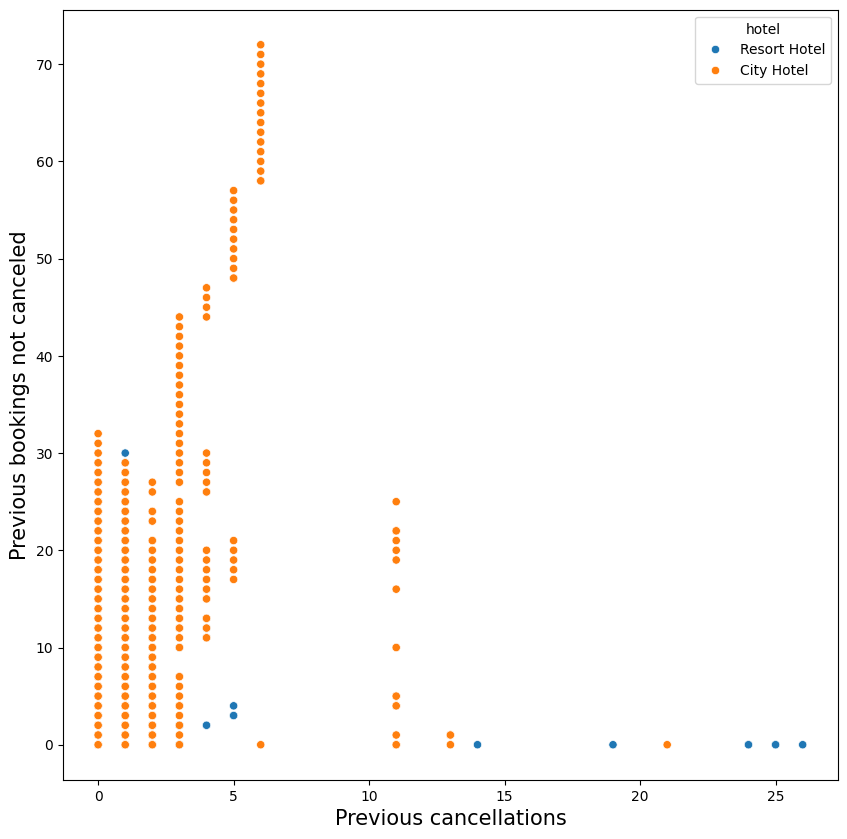

In [114]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(data=pdf, x="previous_cancellations", y="previous_bookings_not_canceled", hue=cate_list[0])
plt.xlabel('Previous cancellations', size = 15)
plt.ylabel('Previous bookings not canceled', size = 15)
plt.show()

In [115]:
pdf.groupby(cate_list[0]).agg({num_list[1]: ['min', 'mean', 'std', 'max'], num_list[2]: ['min', 'mean', 'std', 'max']})

lead_time                          arrival_date_year  \
                   min      mean       std  max               min   
hotel                                                               
City Hotel           0 77.678521 82.113381  629              2015   
Resort Hotel         0 83.371938 91.800279  737              2015   

                                          
                     mean      std   max  
hotel                                     
City Hotel   2,016.253968 0.659292  2017  
Resort Hotel 2,016.141604 0.720948  2017

# Insight 

* previous cancellations tương quan thuận với previous bookings not canceled
* Trung bình previous cancellations của City Hotel cao hơn trung bình previous cancellations của Resort Hotel  